In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
df = load_boston()

In [4]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
df.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
X = df.data

In [7]:
y = df.target

### Cross-validation: Hold-out

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
X_train.shape

(354, 13)

In [10]:
X_test.shape

(152, 13)

### Linear Regression: sklearn

In [11]:
reg = LinearRegression(fit_intercept=True)

In [12]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
reg.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

In [14]:
reg.intercept_

37.93710774183309

In [15]:
reg.score(X_train, y_train)

0.7645451026942549

In [16]:
reg.score(X_test, y_test)

0.6733825506400171

In [17]:
y_pred = reg.predict(X_test)

In [18]:
y_pred[-1]

25.04341153041839

Text(0.5, 1.0, 'boston house prices')

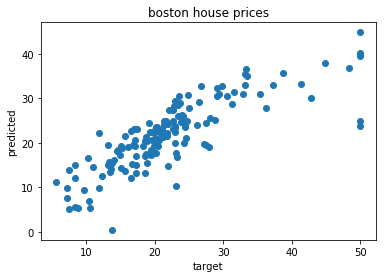

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel("target")
plt.ylabel("predicted")
plt.title("boston house prices")

### Linear Regression: statsmodels

In [20]:
X_train = sm.add_constant(X_train)

In [21]:
reg = sm.OLS(y_train, X_train).fit()

In [22]:
reg.params

array([ 3.79371077e+01, -1.21310401e-01,  4.44664254e-02,  1.13416945e-02,
        2.51124642e+00, -1.62312529e+01,  3.85906801e+00, -9.98516565e-03,
       -1.50026956e+00,  2.42143466e-01, -1.10716124e-02, -1.01775264e+00,
        6.81446545e-03, -4.86738066e-01])

In [23]:
reg.rsquared

0.7645451026942549

In [24]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     84.92
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           2.76e-98
Time:                        11:39:05   Log-Likelihood:                -1032.2
No. Observations:                 354   AIC:                             2092.
Df Residuals:                     340   BIC:                             2147.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.9371      5.876      6.457      0.000      26.380      49.494
x1            -0.1213      0.038     -3.185      0.002      -0.196      -0.046
x2             0.0445      0.016      2.834      0.005       0.014       0.075
x3             0.0113      0.068      0.166      0.868      -0.123       0.146
x4             2.5112      1.011      2.483      0.014       0.522       4.501
x5           -16.2313      4.487     -3.618      0.000     -25.056      -7.406
x6             3.8591      0.491      7.867      0.000       2.894       4.824
x7            -0.0100      0.016     -0.634      0.527      -0.041       0.021
x8            -1.5003      0.234     -6.402      0.000      -1.961      -1.039
x9             0.2421      0.077      3.152      0.002       0.091       0.393
x10           -0.0111      0.004     -2.586      0.010      -0.019      -0.003
x11           -1.0178      0.150     -6.803      0.000      -1.312      -0.723
x12            0.0068      0.003      2.099      0.037       0.000       0.013
x13           -0.4867      0.060     -8.068      0.000      -0.605      -0.368
==============================================================================
Omnibus:                      133.612   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              634.086
Skew:                           1.547   Prob(JB):                    2.04e-138
Kurtosis:                       8.781   Cond. No.                     1.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
X_test = sm.add_constant(X_test)

In [26]:
y_pred = reg.predict(X_test)

In [27]:
r2_score(y_test, y_pred)

0.6733825506400198